In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from apyori import apriori

In [3]:
df=pd.read_csv("Groceries_dataset.csv")

In [4]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
df[df["Member_number"]==1808]

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
4355,1808,04-02-2015,long life bakery product
9090,1808,29-11-2014,meat
11488,1808,15-12-2014,sugar
16149,1808,21-07-2015,rolls/buns
20504,1808,04-02-2015,semi-finished bread
25239,1808,29-11-2014,whole milk
27637,1808,15-12-2014,citrus fruit
36088,1808,21-07-2015,candy
38731,1808,15-12-2014,napkins


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
#Top ten selling items 
df["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

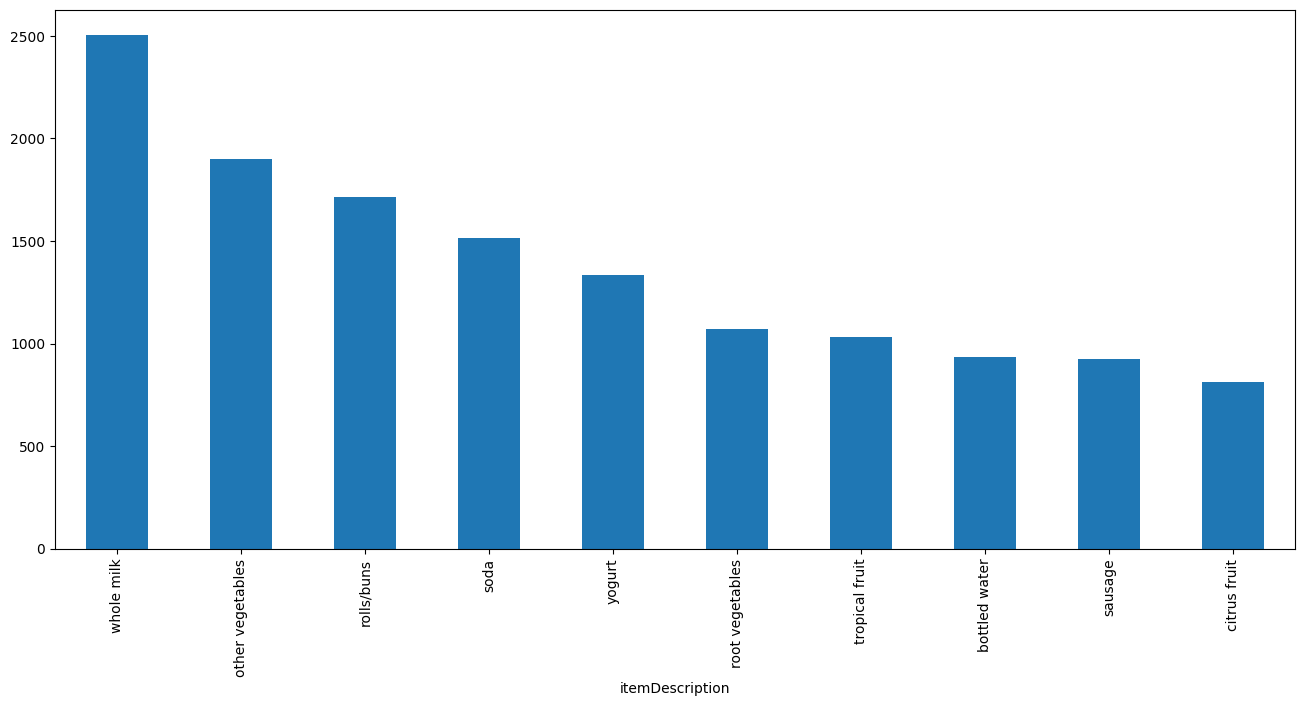

In [9]:
plt.figure(figsize=(16,7))
df["itemDescription"].value_counts().head(10).plot(kind="bar")

In [10]:
#Least 10 selling items 
df["itemDescription"].value_counts().tail(10)

itemDescription
whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

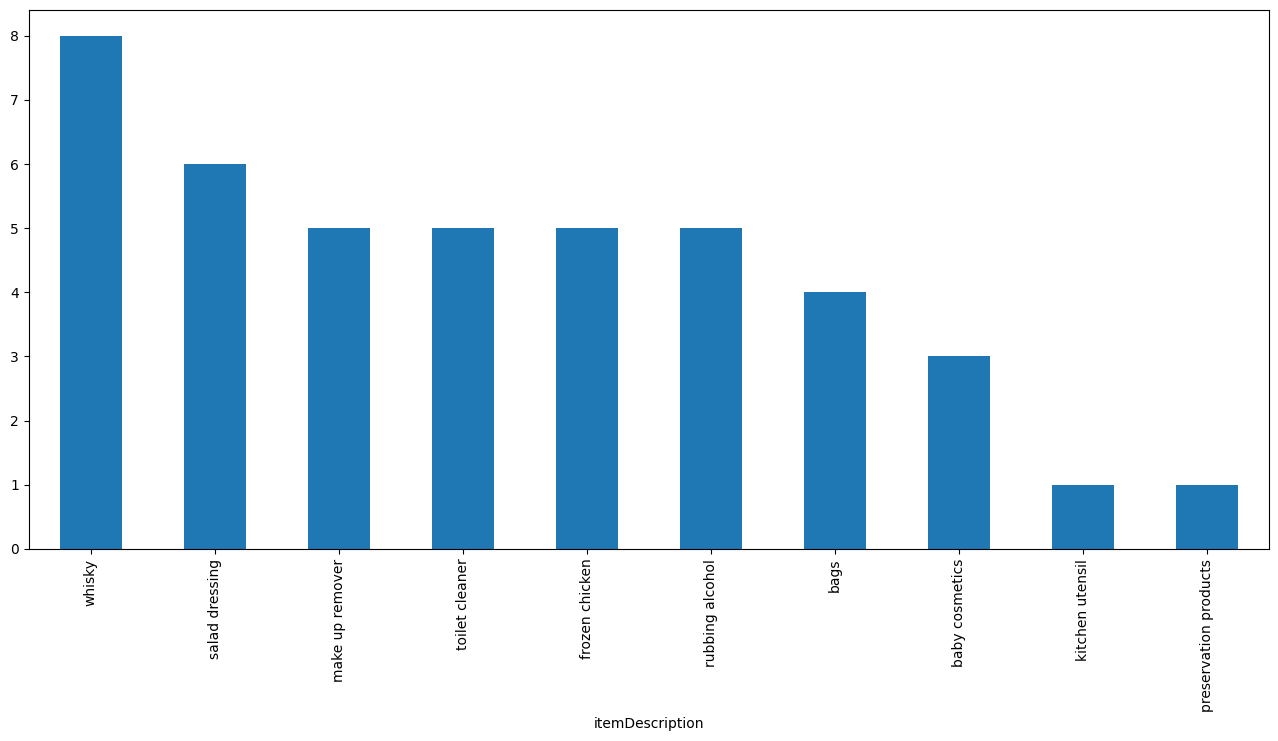

In [11]:
plt.figure(figsize=(16,7))
df["itemDescription"].value_counts().tail(10).plot(kind="bar")

In [12]:
#Top 10 customers 
df["Member_number"].value_counts().head(10)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: count, dtype: int64

In [22]:
#Most frewuently visited
df.groupby(["Member_number"])["Date"].nunique().head(10)

Member_number
1000    5
1001    5
1002    4
1003    4
1004    8
1005    2
1006    4
1008    2
1009    4
1010    5
Name: Date, dtype: int64

<Axes: xlabel='Member_number'>

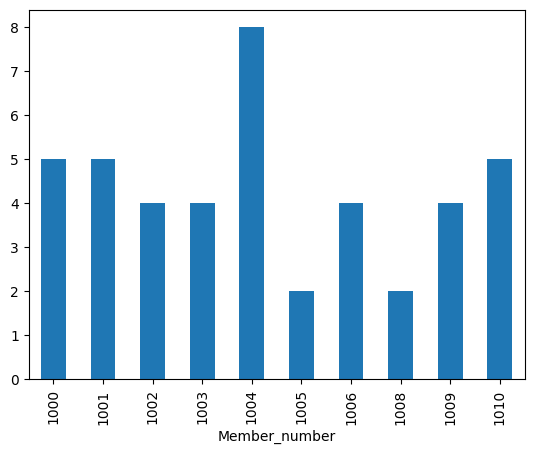

In [23]:
df.groupby(["Member_number"])["Date"].nunique().head(10).plot(kind="bar")

In [26]:
#Busiest year/month/day
df["Date"]=pd.to_datetime(df["Date"])

In [30]:
df["Year"]=pd.DatetimeIndex(df["Date"]).year
df["Month"]=pd.DatetimeIndex(df["Date"]).month
df["Day"]=pd.DatetimeIndex(df["Date"]).day

In [31]:
df

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-01-05,whole milk,2015,1,5
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-02-01,whole milk,2015,2,1
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,2014,10,8
38761,2022,2014-02-23,candy,2014,2,23
38762,1097,2014-04-16,cake bar,2014,4,16
38763,1510,2014-12-03,fruit/vegetable juice,2014,12,3


<Axes: xlabel='Year'>

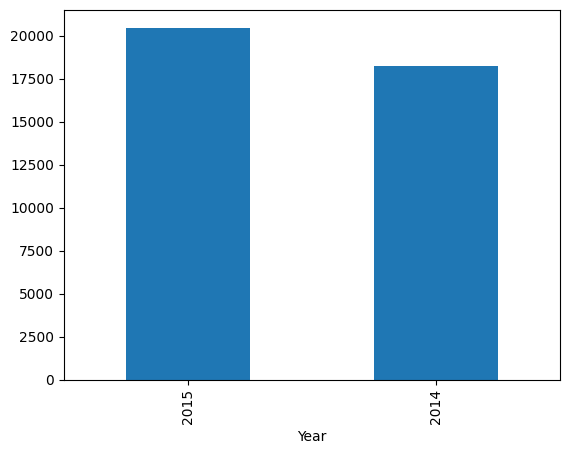

In [34]:
df["Year"].value_counts().plot(kind="bar")

AttributeError: 'Axes' object has no attribute 'sort'

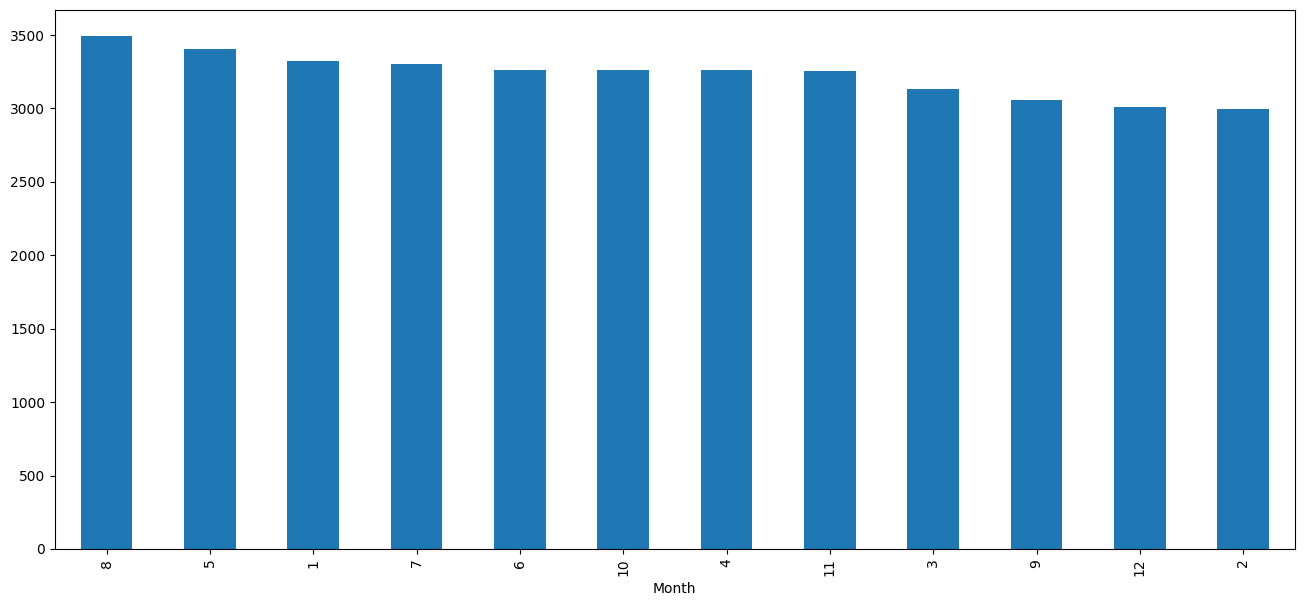

In [39]:
plt.figure(figsize=(16,7))
df["Month"].value_counts().plot(kind="bar")

<Axes: xlabel='Day'>

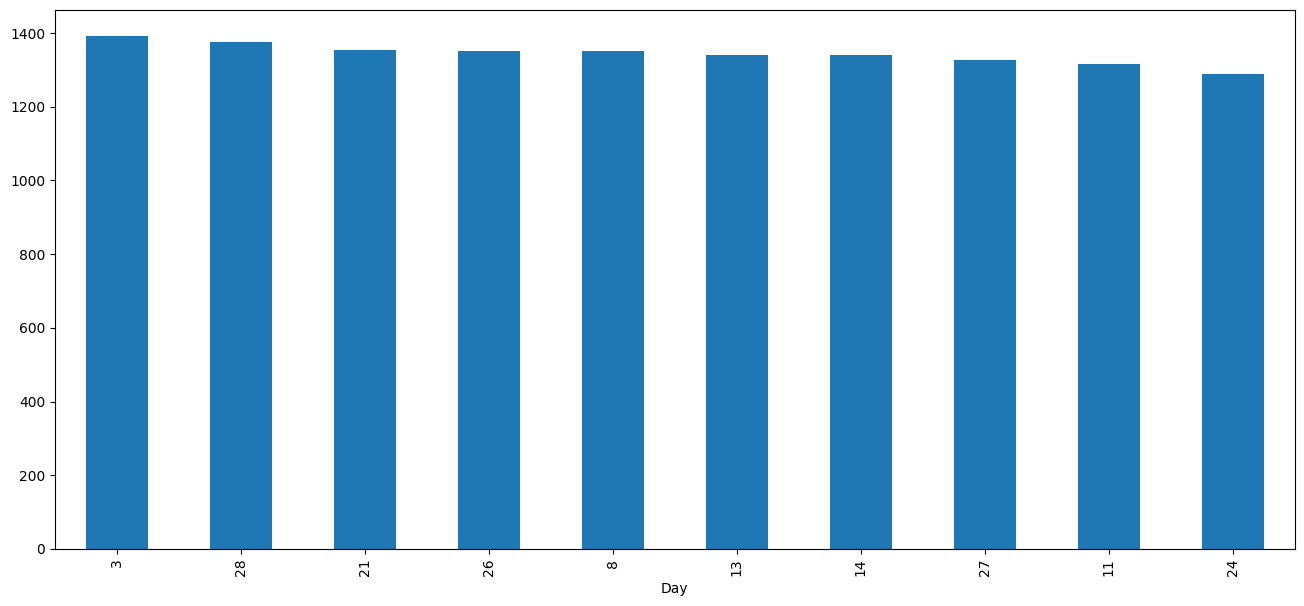

In [40]:
plt.figure(figsize=(16,7))
df["Day"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='Month'>

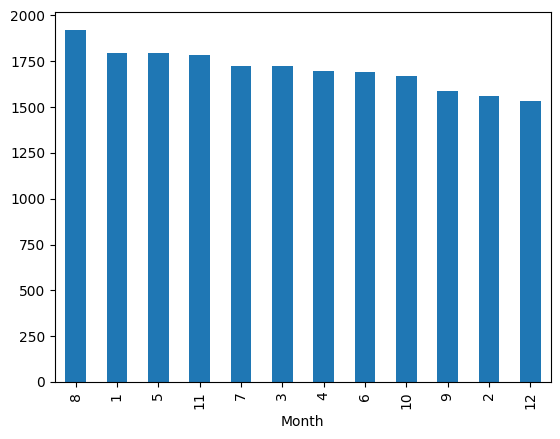

In [56]:
#In 2015 which month has highest sales
df_2015=df[(df["Year"]==2015)]
df_2015
df_2015["Month"].value_counts().plot(kind="bar")

<Axes: xlabel='Month'>

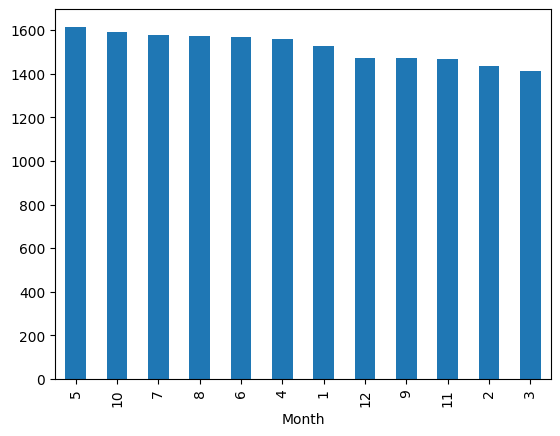

In [57]:
#In 2014 which month has highest sales
df_2014=df[(df["Year"]==2014)]
df_2014
df_2014["Month"].value_counts().plot(kind="bar")

In [64]:
#Data manipulation for MBA 
data=df.copy()

In [66]:
data=pd.get_dummies(data["itemDescription"])

In [67]:
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
data1=df.copy() 
data1.drop(["itemDescription"],axis=1,inplace=True)

In [96]:
data1=data1.join(data)

In [97]:
data1

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,2015,7,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,2015-01-05,2015,1,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,2015-09-19,2015,9,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,2015-12-12,2015,12,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,2015-02-01,2015,2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,2014,10,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,2022,2014-02-23,2014,2,23,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,1097,2014-04-16,2014,4,16,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,1510,2014-12-03,2014,12,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
finaldf=data1.groupby(["Member_number","Date"]).sum().reset_index()

In [103]:
finaldf

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,2014-06-24,6042,18,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000,2015-03-15,8060,12,60,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1000,2015-05-27,4030,10,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,2015-07-24,4030,14,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,2015-11-25,4030,22,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999,2015-05-16,4030,10,32,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,4999,2015-12-26,4030,24,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,5000,2014-03-09,4028,6,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,5000,2014-11-16,4028,22,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
finaldf.drop(["Member_number","Date","Year","Month","Day"],axis=1,inplace=True)

In [105]:
finaldf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 167 entries, Instant food products to zwieback
dtypes: object(167)
memory usage: 19.1+ MB


In [115]:
lst=finaldf.columns
lst

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

In [122]:
def change(x):
    for i in lst:
        if x[i]=="1": 
            x[i]=i 
    return x 

In [124]:
finaldf=finaldf.apply(change,axis=1)
finaldf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,whole milk,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,whole milk,yogurt,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,whipped/sour cream,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
new_data=finaldf.values
new_data=[i[i!=0].tolist() for i in new_data if i[i!=0].tolist()]

In [150]:
new_data

[['pastry', 'salty snack', 'whole milk'],
 ['sausage', 'semi-finished bread', 'whole milk', 'yogurt'],
 ['pickled vegetables', 'soda'],
 ['canned beer', 'misc. beverages'],
 ['hygiene articles', 'sausage'],
 ['rolls/buns', 'sausage', 'whole milk'],
 ['soda', 'whole milk'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['curd', 'frankfurter'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['sugar', 'tropical fruit'],
 ['butter milk', 'specialty chocolate'],
 ['dental care', 'frozen meals'],
 ['rolls/buns'],
 ['detergent', 'root vegetables'],
 ['rolls/buns', 'sausage'],
 ['pip fruit', 'tropical fruit', 'whole milk'],
 ['cling film/bags', 'dish cleaner'],
 ['chocolate', 'red/blush wine', 'rolls/buns'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['pastry', 'root vegetables', 'whole milk'],
 ['chocolate', 'packaged fruit/vegetables', 'rolls/buns', 'whole milk'],
 ['hygiene articles', 'other vegetables'],
 

In [189]:
association=apriori(new_data,min_support=0.0002,min_confidence=1,max_length=3,min_lift=3)

In [190]:
result=list(association)
result

[RelationRecord(items=frozenset({'butter', 'whole milk', 'processed cheese'}), support=0.00020049455323130388, ordered_statistics=[OrderedStatistic(items_base=frozenset({'butter', 'processed cheese'}), items_add=frozenset({'whole milk'}), confidence=1.0, lift=6.332204824375794)]),
 RelationRecord(items=frozenset({'domestic eggs', 'whole milk', 'canned vegetables'}), support=0.00020049455323130388, ordered_statistics=[OrderedStatistic(items_base=frozenset({'domestic eggs', 'canned vegetables'}), items_add=frozenset({'whole milk'}), confidence=1.0, lift=6.332204824375794)]),
 RelationRecord(items=frozenset({'whole milk', 'pork', 'flower (seeds)'}), support=0.00020049455323130388, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pork', 'flower (seeds)'}), items_add=frozenset({'whole milk'}), confidence=1.0, lift=6.332204824375794)]),
 RelationRecord(items=frozenset({'whole milk', 'house keeping products', 'margarine'}), support=0.00020049455323130388, ordered_statistics=[Ordere